# 0.0 Imports

In [12]:
import time
import numpy as np

from IPython          import display
from matplotlib       import pyplot              as plt

from sklearn.cluster  import AffinityPropagation
from sklearn.metrics  import silhouette_score
from sklearn.datasets import make_blobs

## 0.1 Datasets

In [2]:
X, _ = make_blobs( n_samples=300,
                   centers=4,
                   cluster_std=0.6,
                   random_state=0
                 )

In [4]:
X[:10]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207],
       [ 3.43761754,  0.26165417],
       [-1.80822253,  1.59701749],
       [ 1.41372442,  4.38117707],
       [-0.20493217,  8.43209665],
       [-0.71109961,  8.66043846]])

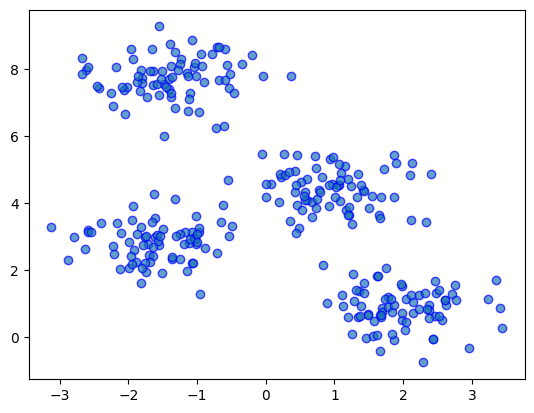

In [6]:
plt.scatter( X[:, 0], X[:, 1], alpha=0.7, edgecolors='b' );

# 1.0 Training

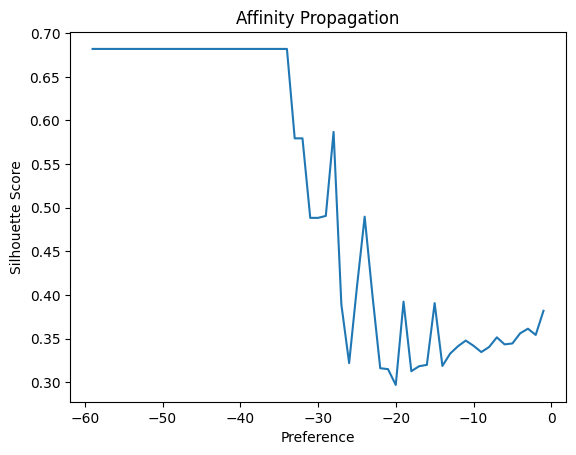

<Figure size 640x480 with 0 Axes>

In [15]:
p = np.arange( -1, -61, -1 )
ss_list = list()

for i in range( len(p) ):
    # model definition
    model = AffinityPropagation( preference=p[i] )
    
    # model training
    model.fit( X )
    
    # model performance
    labels = model.predict( X )
    
    # performance
    ss = silhouette_score( X, labels )
    
    ss_list.append( ss )
    
    
    # plot
    plt.plot( p[:i], ss_list[:i] )
    
    plt.title( 'Affinity Propagation' )
    plt.xlabel( 'Preference' )
    plt.ylabel( 'Silhouette Score' )
    
    display.clear_output( wait=True )
    plt.show()
    plt.gcf()
    time.sleep( 0.05 )
    

# 2.0 Final Clustering

In [18]:
max( ss_list )

0.6819938690643478

In [21]:
ss_list.index( max(ss_list) )

33

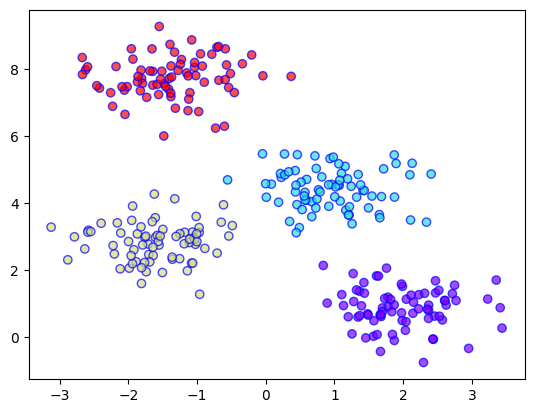

In [33]:
p_best_index = ss_list.index( max( ss_list ) )

# model definition
af = AffinityPropagation( preference=p[ p_best_index ] )

# model training
af.fit( X )

# model prediction
labels = af.predict( X )


fig = plt.figure()

plt.scatter( X[:, 0], X[:, 1], c=labels, alpha=0.7, edgecolors='b', cmap='rainbow' );

In [34]:
print( f'Número de Clusters: { len( np.unique(labels) )}' )

Número de Clusters: 4
